In [18]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = fashion_mnist.load_data()

In [20]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


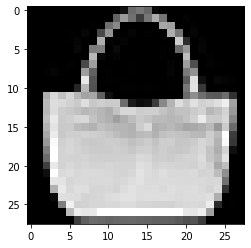

In [22]:
plt.imshow(X_train[100], cmap = 'gray')

- 정답 데이터를 확률 정보로 변경하기

In [23]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [24]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


- 1차원으로 변경

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
# X_train = X_train.reshape(60000,-1)
# X_test = X_test.reshape(10000,-1)

In [10]:
# X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- 신경망 설계

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동으로 펴주는 역할을 하는 모듈

In [31]:
# 1. 신경망 구조 설계
# 이미지에선 층 쌓는게 중요인자
model = Sequential()

# 입력층
model.add(Flatten(input_shape=(28,28)))

# 중간층
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))

# 출력층
model.add(Dense(10, activation="softmax"))

# summary() : 신경망의 층별, 전체 정보를 요약해서 표시
model.summary()

# params 입력 출력 곱하고 출력 자체 더해줌

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [32]:
# 2. 학습/평가 방법 설정
# categorical_crossentropy: 다중 분류에 사용하는 손실함수(비용함수)
# optimizer = 최적화 도구
model.compile(loss="categorical_crossentropy",
              optimizer="adam",   # Adam
              metrics=["acc"] # 분류 지표: 정확도
              )

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot)

In [36]:
# 3. 학습
h1 = model.fit(X_train, y_train_one_hot, validation_data = (X_val,
                                                             y_val_one_hot),epochs=30)

Epoch 1/30
1055/1055 [==============================] - 3s 3ms/step - loss: 1.8963 - acc: 0.2566 - val_loss: 1.2142 - val_acc: 0.4950
Epoch 2/30
1055/1055 [==============================] - 3s 3ms/step - loss: 1.1996 - acc: 0.4998 - val_loss: 1.1616 - val_acc: 0.5362
Epoch 3/30
1055/1055 [==============================] - 3s 3ms/step - loss: 1.1284 - acc: 0.5343 - val_loss: 1.1456 - val_acc: 0.5188
Epoch 4/30
1055/1055 [==============================] - 3s 3ms/step - loss: 1.1341 - acc: 0.5309 - val_loss: 1.0793 - val_acc: 0.5531
Epoch 5/30
1055/1055 [==============================] - 3s 3ms/step - loss: 1.1165 - acc: 0.5166 - val_loss: 1.0629 - val_acc: 0.5430
Epoch 6/30
1055/1055 [==============================] - 3s 2ms/step - loss: 1.0807 - acc: 0.5349 - val_loss: 1.1127 - val_acc: 0.4798
Epoch 7/30
1055/1055 [==============================] - 3s 3ms/step - loss: 1.0345 - acc: 0.5745 - val_loss: 1.0362 - val_acc: 0.5798
Epoch 8/30
1055/1055 [==============================] - 3s 3ms

In [37]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 0s 1ms/step - loss: 0.7812 - acc: 0.7177


[0.7812283635139465, 0.7177000045776367]

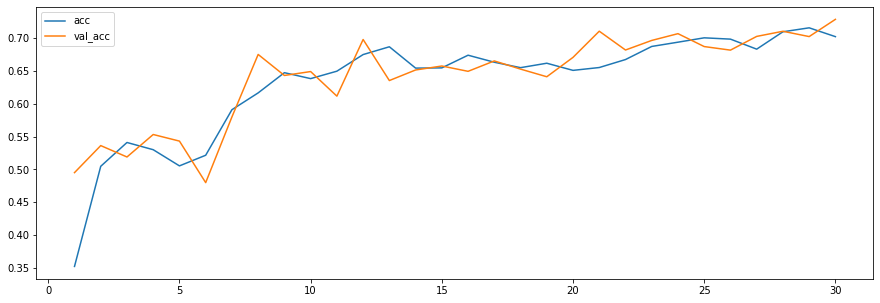

In [38]:
plt.figure(figsize=(15,5))
plt.plot(range(1,31,1),
         h1.history['acc'],
         label = 'acc'
         )

plt.plot(range(1,31,1),
         h1.history['val_acc'],
         label = 'val_acc'
         )

plt.legend()
plt.show()